In [1]:
from skgstat import Variogram, OrdinaryKriging, plotting
import numpy as np
import pandas as pd

In [3]:
import pandas as pd

# Replace 'your_data.csv' with the actual file path
df = pd.read_csv(r'C:\Users\eobasi.2NCJQ13\Downloads\Wells_with_SweetSpotMetric.csv')

# Now df is a DataFrame containing your data


In [39]:

# to have nicer plots, we switch to plotly backend
plotting.backend('plotly')

# Assuming 'df' is your DataFrame and it contains 'X', 'Y', and 'SweetSpotMetric' columns
V = Variogram(
    coordinates=list(zip(df['Easting'], df['Northing'])), 
    values=df['SweetSpotMetric'],
    normalize=False,
    model="exponential",
    use_nugget=True,
    nugget=0.002,
    n_lags=85,
    maxlag=80000
)
fig = V.plot()


In [40]:
V

< exponential Semivariogram fitted to 85 bins >

In [41]:
# Plot the experimental variogram


# Fit with linear weights and plot
V.fit_sigma = 'linear'
fig1 = V.plot(show=False)
fig1.update_layout(title='Linear Weights', width=1000)

# Fit with square root weights and plot
V.fit_sigma = 'sqrt'
fig2 = V.plot(show=False)
fig2.update_layout(title='Sqrt-decrease Weights', width=1000)

# Show the plots
fig1.show()
fig2.show()



In [42]:
# Determine the grid boundaries based on the dataset
xmin, xmax = df['Easting'].min(), df['Easting'].max()
ymin, ymax = df['Northing'].min(), df['Northing'].max()

# Determine the grid resolution
res_x = 100  # Resolution in x-direction
res_y = int((ymax - ymin) * res_x / (xmax - xmin))  # Resolution in y-direction for a regular grid

# Build the grid
xx, yy = np.mgrid[xmin:xmax:complex(res_x), ymin:ymax:complex(res_y)]



In [43]:
# Build the kriging model
ok = OrdinaryKriging(V, min_points=5, max_points=40, mode='exact')




In [44]:
# Perform the kriging on the grid and reshape the results
predicted_values = ok.transform(xx.flatten(), yy.flatten()).reshape(xx.shape)
kriging_variance = ok.sigma.reshape(xx.shape)



In [45]:
predicted_values.max()

0.6705038340045633

In [46]:
predicted_values.min()

0.5490990497623229

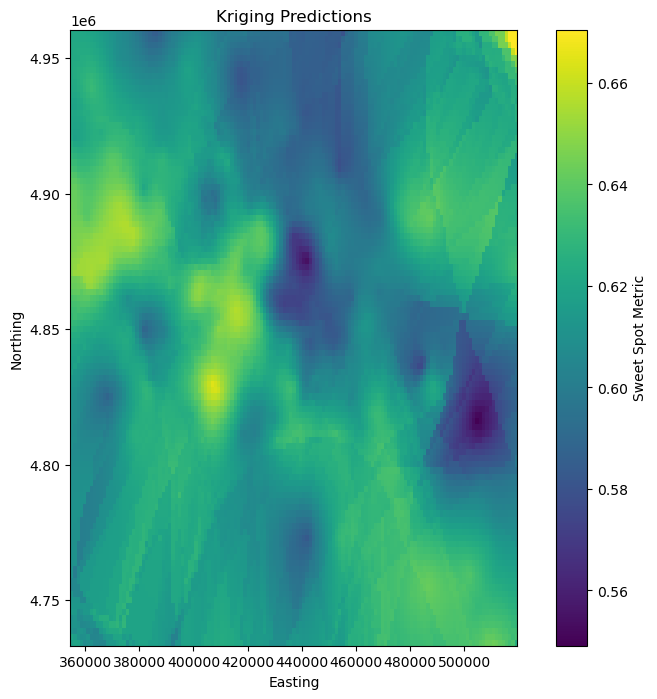

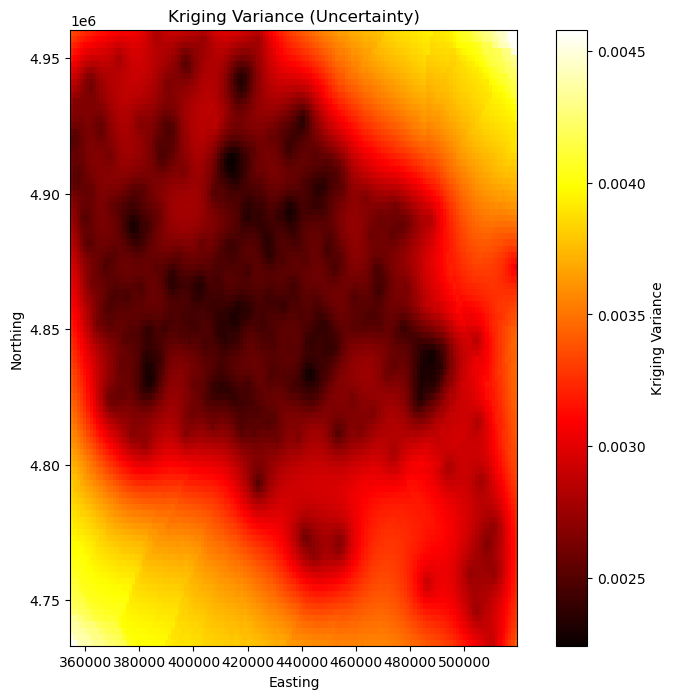

In [47]:
import matplotlib.pyplot as plt

# Plot the kriging predictions
plt.figure(figsize=(10, 8))
plt.imshow(predicted_values, origin='lower', extent=(xmin, xmax, ymin, ymax))
plt.colorbar(label='Sweet Spot Metric')
plt.title('Kriging Predictions')
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.show()

# Plot the kriging variance
plt.figure(figsize=(10, 8))
plt.imshow(kriging_variance, origin='lower', extent=(xmin, xmax, ymin, ymax), cmap='hot')
plt.colorbar(label='Kriging Variance')
plt.title('Kriging Variance (Uncertainty)')
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.show()


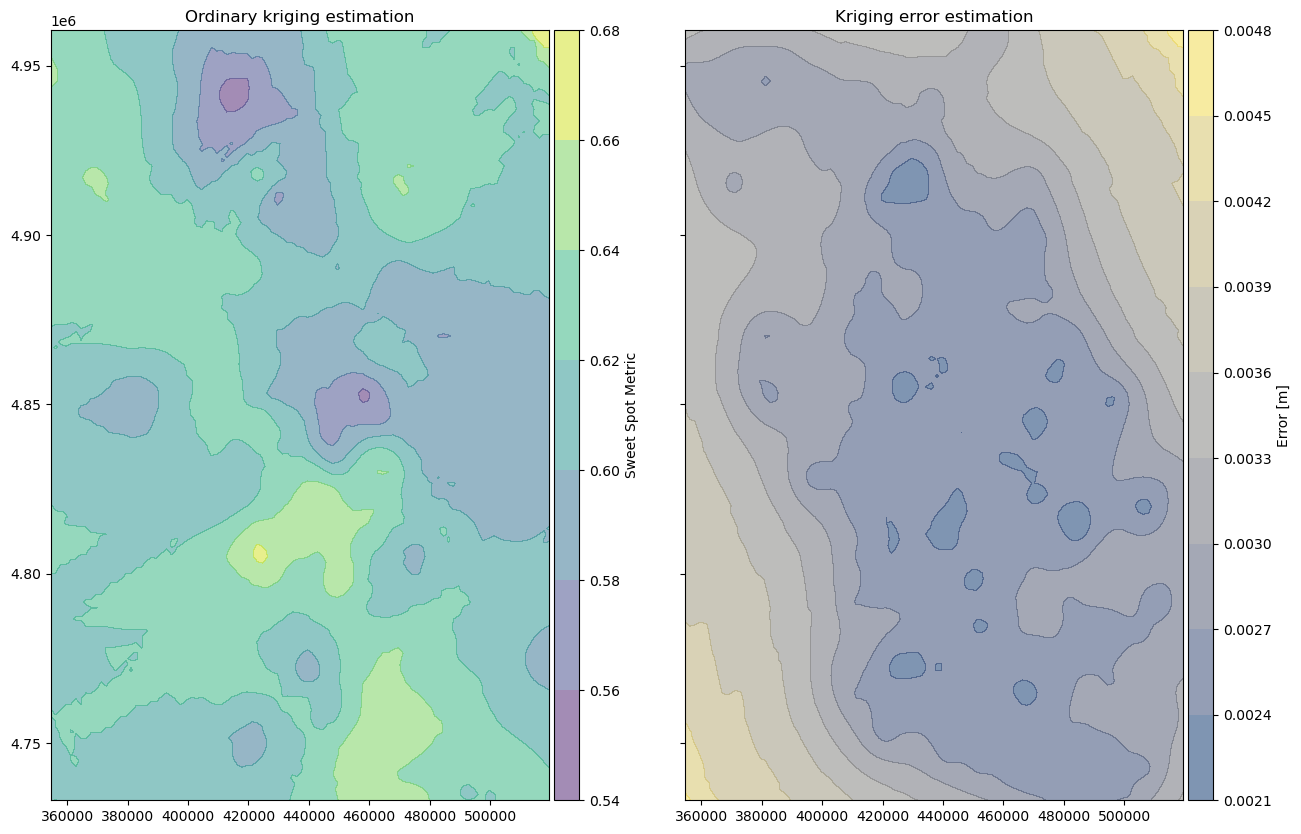

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10), sharey=True)

ax = axs[0]

# Contour fringes of the kriging process:
ctr_hh = ax.contourf(xx, yy, predicted_values,
                     cmap="viridis",  # Changed from "jet" to "viridis"
                     alpha=0.5)

ax.set_title("Ordinary kriging estimation")
from mpl_toolkits.axes_grid1 import make_axes_locatable

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(ctr_hh, cax=cax, label='Sweet Spot Metric')  # Updated label here

# Uncomment the following lines if you have a GeoDataFrame 'gdf' to plot the locations
# gdf.plot(ax=ax, color="black", marker='.', markersize=2)

ax = axs[1]

# Contour fringes of the kriging error:
ctr_err = ax.contourf(xx, yy, kriging_variance,
                      cmap="cividis",  # Changed from "plasma" to "cividis"
                      alpha=0.5)
ax.set_title("Kriging error estimation")

# Uncomment the following lines if you have a GeoDataFrame 'gdf' to plot the locations
# gdf.plot(ax=ax, color="black", marker='.', markersize=2)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(ctr_err, cax=cax, label='Error [m]')  # Error label remains the same

plt.show()


In [ ]:
# Optional: if you need to back-transform the results, you can apply your transformation here
# Be sure to replace 'geostats.backtr' with your actual back-transformation function
# and 'trans_vr', 'trans_ns', 'zmin', 'zmax', 'ltail', 'ltpar', 'utail', 'utpar' with the correct parameters

# Example placeholder for back-transformation (replace with your actual code)
# predicted_values_orig = your_back_transform_function(predicted_values)
# kriging_variance_orig = your_back_transform_function(kriging_variance)

# Reshape the back-transformed results if needed
# predicted_values_orig = predicted_values_orig.reshape(predicted_values.shape)
# kriging_variance_orig = kriging_variance_orig.reshape(kriging_variance.shape)